## **Heaart Disease Prediction System**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

In [2]:
# Ignore warnings

import warnings
# Setting the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

### Loading Dataset

In [3]:
df = pd.read_csv('/content/heart.csv')

In [4]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [5]:
df.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df.shape

(1025, 14)

## **Exploratory Data Analysis (EDA)**

In [7]:
df.shape

(1025, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
duplicate_rows_df = df[df.duplicated()] # Checking and displaying number of duplicate rows
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (723, 14)


In [10]:
df.drop_duplicates(inplace = True ) # Removing duplicate rows

In [11]:
duplicate_rows_df = df[df.duplicated()] # Checking and displaying number of duplicate rows
print("number of duplicate rows: ", duplicate_rows_df.shape)   # Now it should not show any duplicate row

number of duplicate rows:  (0, 14)


In [12]:
df.shape

(302, 14)

In [13]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


### Checking missing data

In [14]:
print(df.isnull().sum()) # Finding number of null or missing values in each feature

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [15]:
df.count() # Here we can also findout null values one again

,0
age,302
sex,302
cp,302
trestbps,302
chol,302
fbs,302
restecg,302
thalach,302
exang,302
oldpeak,302


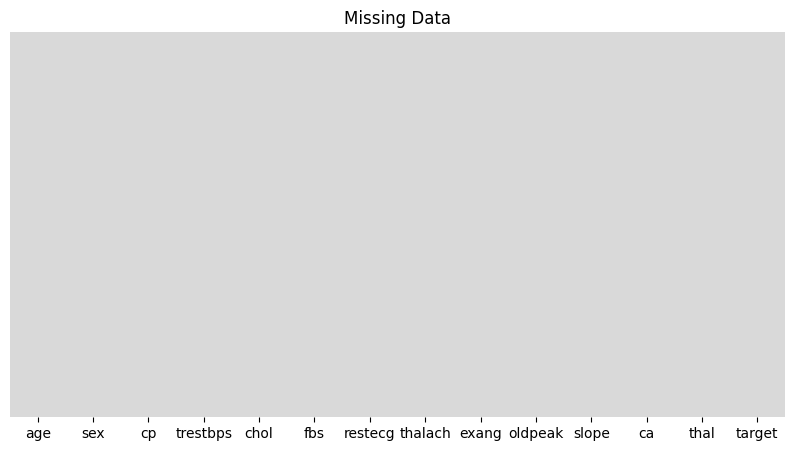

In [16]:
# Heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

In [17]:
df.shape

(302, 14)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [19]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


### Detecting Outliers

<Axes: xlabel='age'>

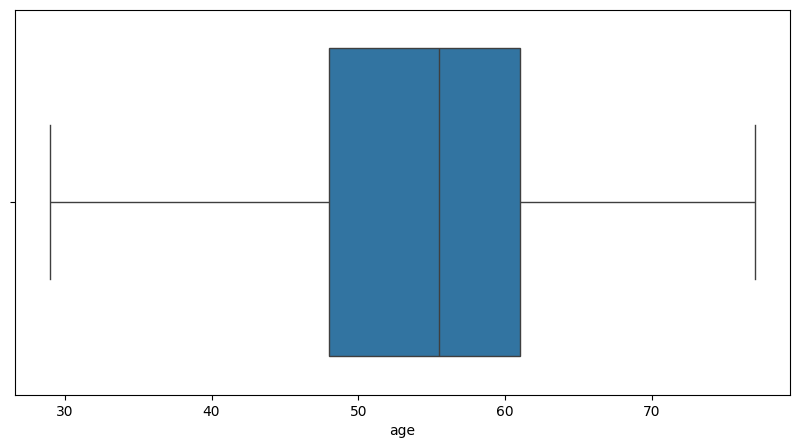

In [20]:
sns.boxplot(x=df['age'])

<Axes: xlabel='sex'>

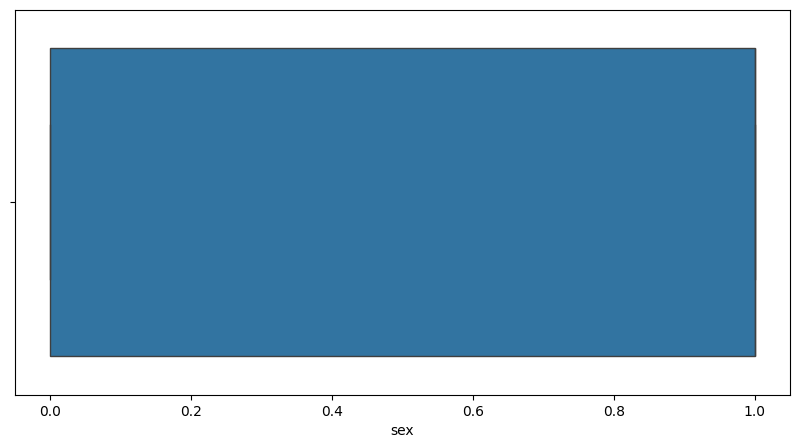

In [21]:
sns.boxplot(x=df['sex'])

<Axes: xlabel='cp'>

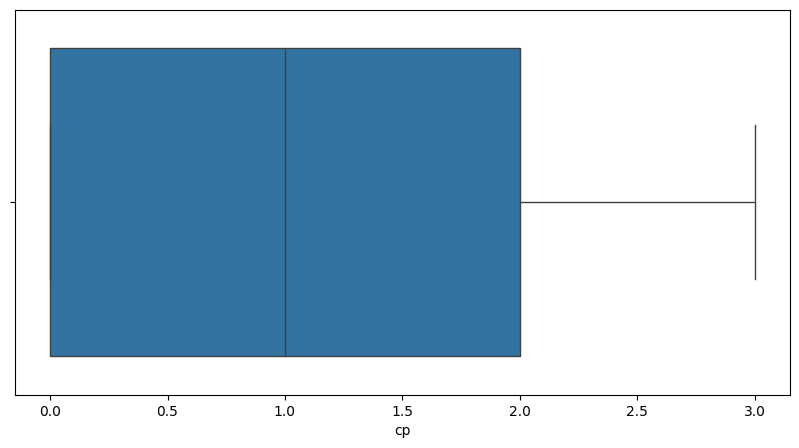

In [22]:
sns.boxplot(x=df['cp'])

<Axes: xlabel='trestbps'>

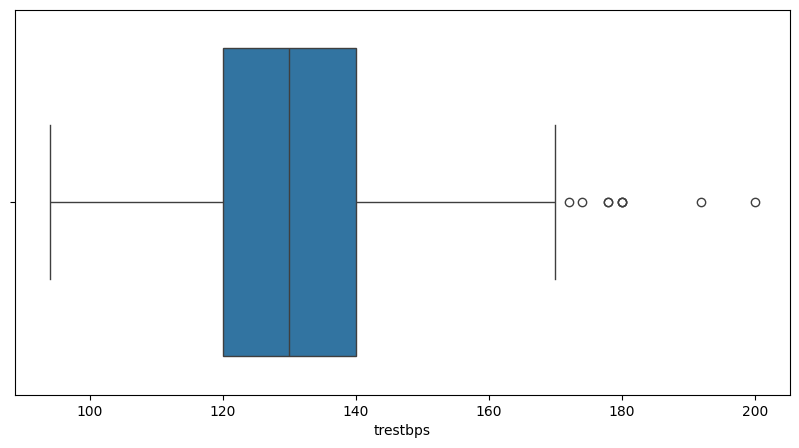

In [23]:
sns.boxplot(x=df['trestbps'])

<Axes: xlabel='chol'>

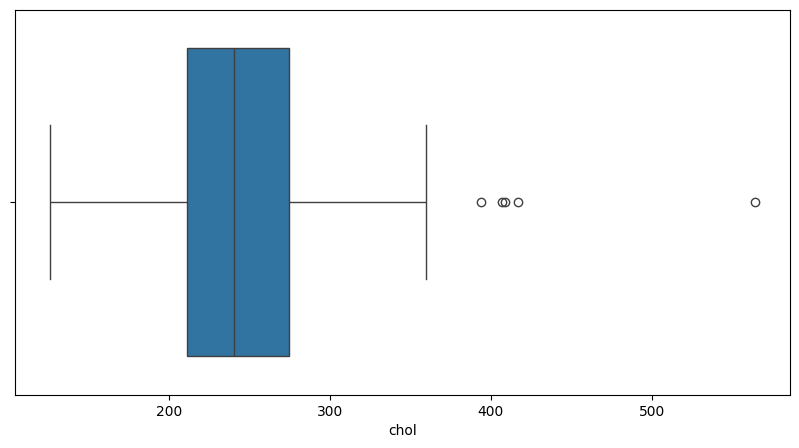

In [24]:
sns.boxplot(x=df['chol'])

<Axes: xlabel='fbs'>

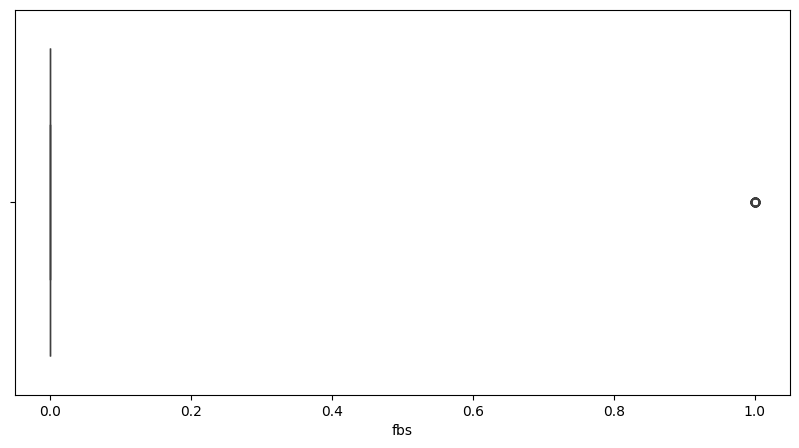

In [25]:
sns.boxplot(x=df['fbs'])

<Axes: xlabel='restecg'>

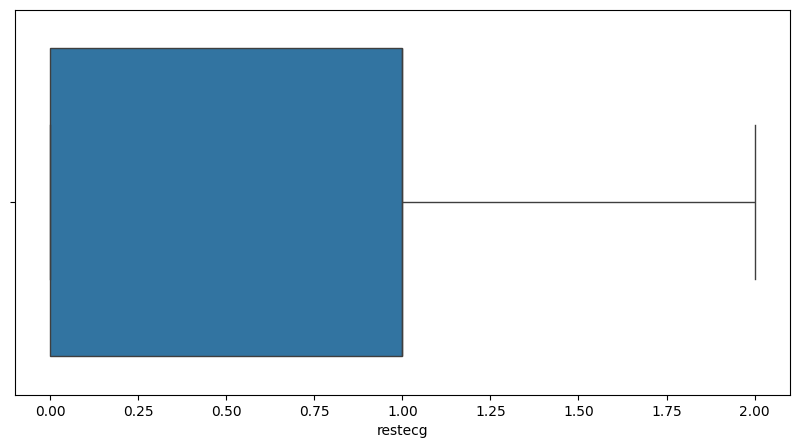

In [26]:
sns.boxplot(x=df['restecg'])

<Axes: xlabel='thalach'>

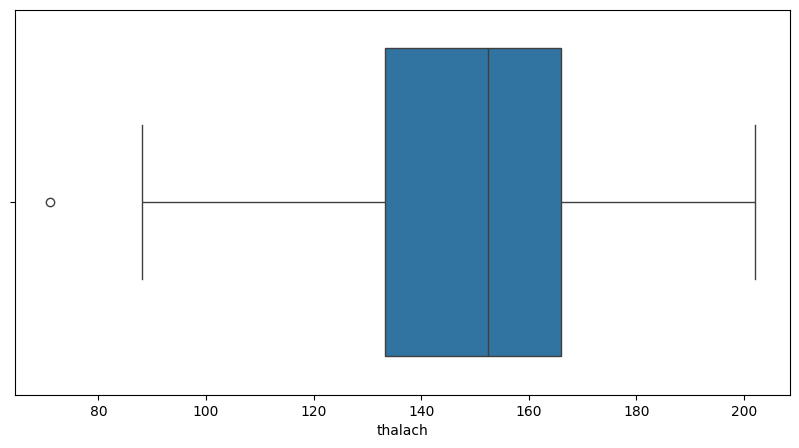

In [27]:
sns.boxplot(x=df['thalach'])

<Axes: xlabel='exang'>

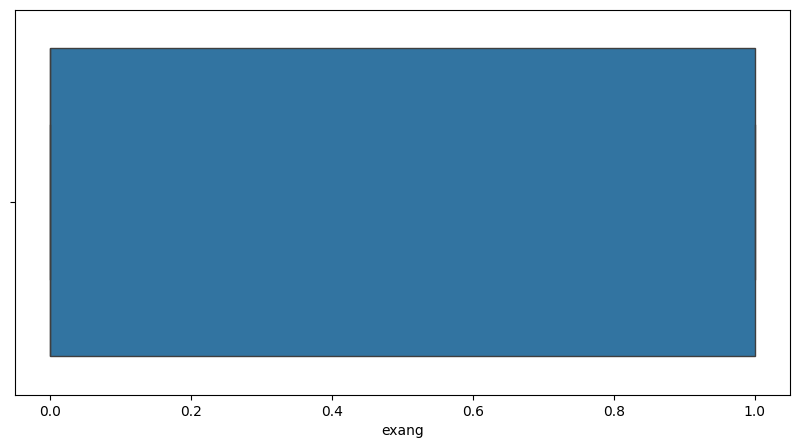

In [28]:
sns.boxplot(x=df['exang'])

<Axes: xlabel='oldpeak'>

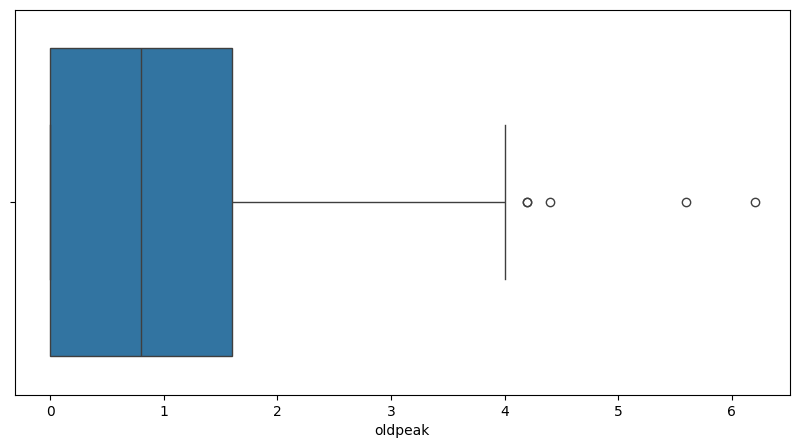

In [29]:
sns.boxplot(x=df['oldpeak'])

<Axes: xlabel='slope'>

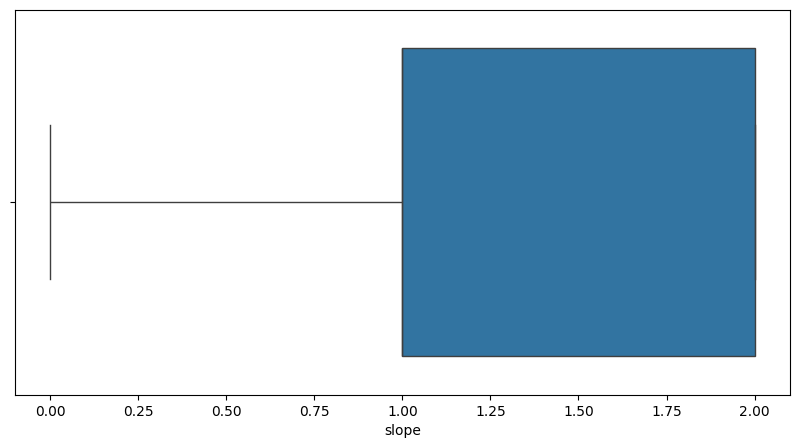

In [30]:
sns.boxplot(x=df['slope'])

<Axes: xlabel='ca'>

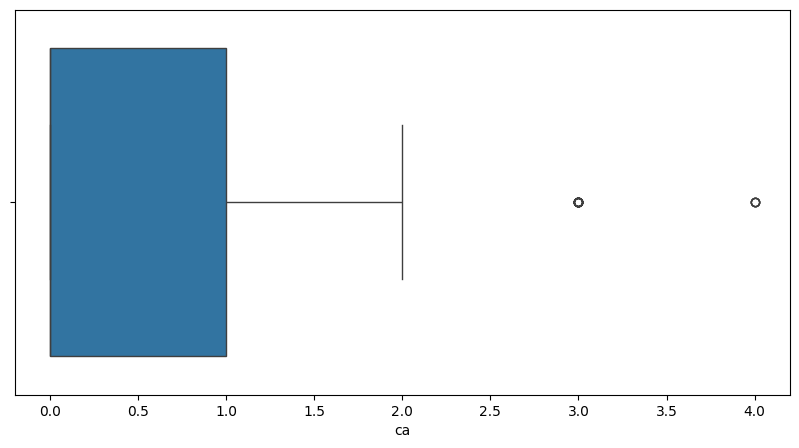

In [31]:
sns.boxplot(x=df['ca'])

<Axes: xlabel='thal'>

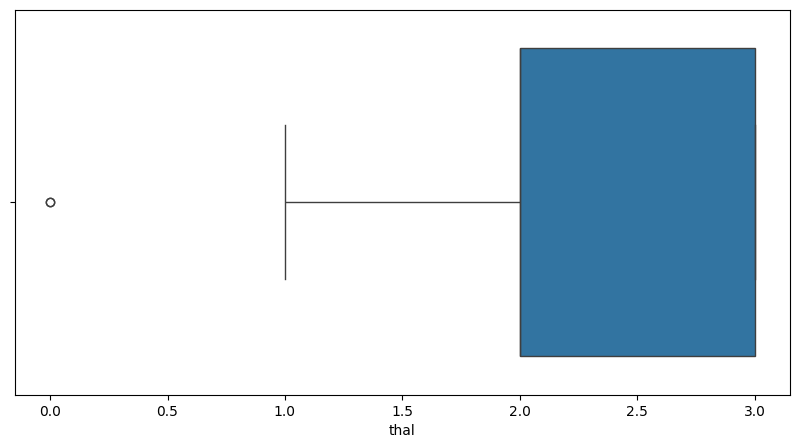

In [32]:
sns.boxplot(x=df['thal'])

<Axes: xlabel='target'>

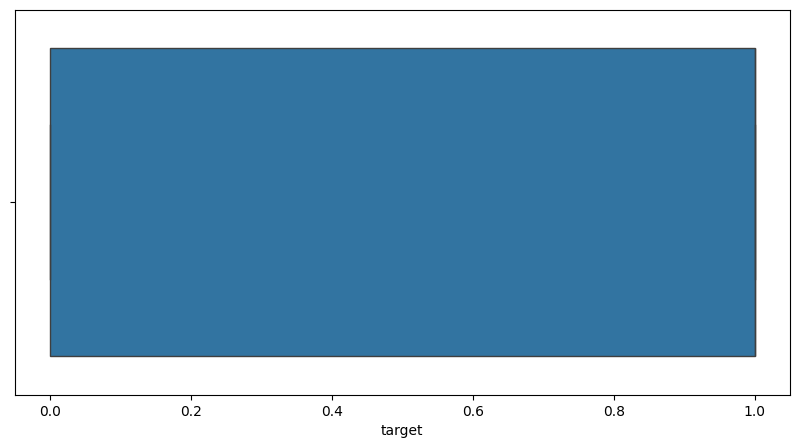

In [33]:
sns.boxplot(x=df['target'])

### Handling outliers

In [34]:
features = ['trestbps', 'chol','fbs', 'thalach', 'oldpeak', 'ca', 'thal']  # The features consisting outliers
for feature in features:
    Q1 = df[feature].quantile(0.25) # First 25% of the whole data
    Q3 = df[feature].quantile(0.75) # data between 50% and 75% of the whole data
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = df[feature].clip(lower_bound, upper_bound)

### Now again some random checking to make sure that outliers have been removed successfully

<Axes: xlabel='trestbps'>

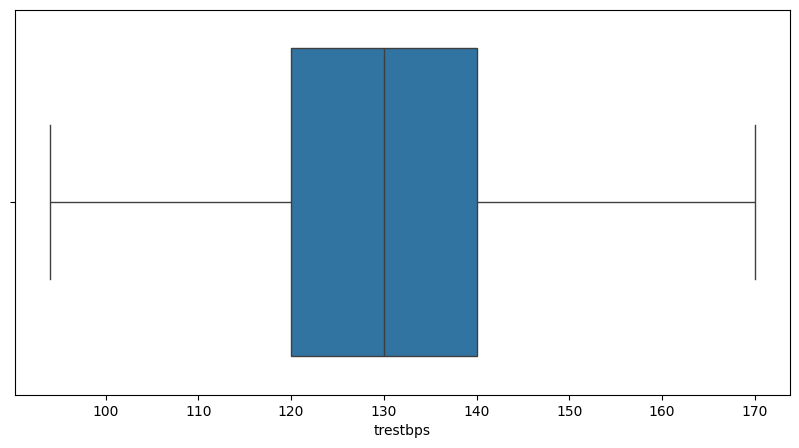

In [35]:
sns.boxplot(x=df['trestbps'])

<Axes: xlabel='chol'>

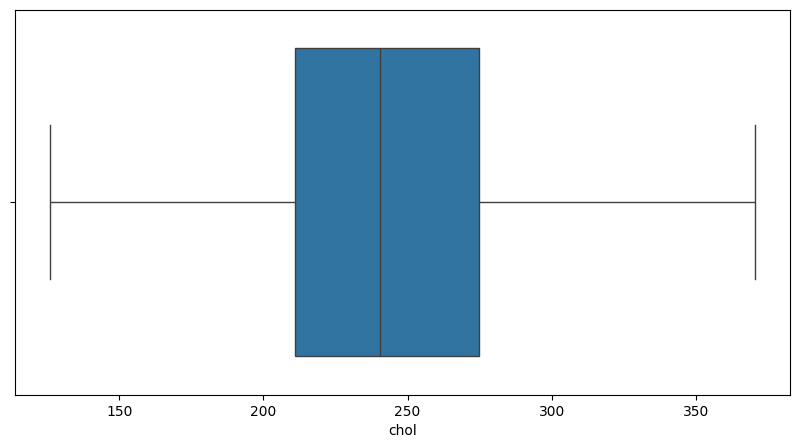

In [36]:
sns.boxplot(x=df['chol'])

### As there is no outlier detected so now we will move to the next step

## Correlation between different features

In [37]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.290209,0.198901,NaN,-0.111590,-0.394960,0.093216,0.209143,-0.164124,0.339540,0.065372,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.048559,-0.178446,NaN,-0.060351,-0.045414,0.143460,0.107575,-0.032990,0.104337,0.213268,-0.283609
cp,-0.063107,-0.051740,1.000000,0.055026,-0.089633,NaN,0.041561,0.293351,-0.392937,-0.142327,0.116854,-0.214593,-0.163187,0.432080
trestbps,0.290209,-0.048559,0.055026,1.000000,0.135429,NaN,-0.117933,-0.055130,0.056350,0.182151,-0.115248,0.099233,0.050941,-0.140083
chol,0.198901,-0.178446,-0.089633,0.135429,1.000000,NaN,-0.137117,-0.014519,0.080653,0.053210,0.010459,0.108473,0.084519,-0.099932
fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,-0.111590,-0.060351,0.041561,-0.117933,-0.137117,NaN,1.000000,0.043183,-0.068807,-0.059850,0.090402,-0.095604,-0.010948,0.134874
thalach,-0.394960,-0.045414,0.293351,-0.055130,-0.014519,NaN,0.043183,1.000000,-0.381027,-0.349367,0.385844,-0.246889,-0.101701,0.420408
exang,0.093216,0.143460,-0.392937,0.056350,0.080653,NaN,-0.068807,-0.381027,1.000000,0.298094,-0.256106,0.145363,0.211713,-0.435601
oldpeak,0.209143,0.107575,-0.142327,0.182151,0.053210,NaN,-0.059850,-0.349367,0.298094,1.000000,-0.572578,0.260397,0.208488,-0.435099


### As for feature "fbs" the correlation results NaN result, this may be due to varience equal to zero.
### So here we will simply remove it

In [38]:
df.drop('fbs', axis = 1, inplace = True)

In [39]:
df.corr()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.290209,0.198901,-0.111590,-0.394960,0.093216,0.209143,-0.164124,0.339540,0.065372,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.048559,-0.178446,-0.060351,-0.045414,0.143460,0.107575,-0.032990,0.104337,0.213268,-0.283609
cp,-0.063107,-0.051740,1.000000,0.055026,-0.089633,0.041561,0.293351,-0.392937,-0.142327,0.116854,-0.214593,-0.163187,0.432080
trestbps,0.290209,-0.048559,0.055026,1.000000,0.135429,-0.117933,-0.055130,0.056350,0.182151,-0.115248,0.099233,0.050941,-0.140083
chol,0.198901,-0.178446,-0.089633,0.135429,1.000000,-0.137117,-0.014519,0.080653,0.053210,0.010459,0.108473,0.084519,-0.099932
restecg,-0.111590,-0.060351,0.041561,-0.117933,-0.137117,1.000000,0.043183,-0.068807,-0.059850,0.090402,-0.095604,-0.010948,0.134874
thalach,-0.394960,-0.045414,0.293351,-0.055130,-0.014519,0.043183,1.000000,-0.381027,-0.349367,0.385844,-0.246889,-0.101701,0.420408
exang,0.093216,0.143460,-0.392937,0.056350,0.080653,-0.068807,-0.381027,1.000000,0.298094,-0.256106,0.145363,0.211713,-0.435601
oldpeak,0.209143,0.107575,-0.142327,0.182151,0.053210,-0.059850,-0.349367,0.298094,1.000000,-0.572578,0.260397,0.208488,-0.435099
slope,-0.164124,-0.032990,0.116854,-0.115248,0.010459,0.090402,0.385844,-0.256106,-0.572578,1.000000,-0.094116,-0.104335,0.343940


<Axes: >

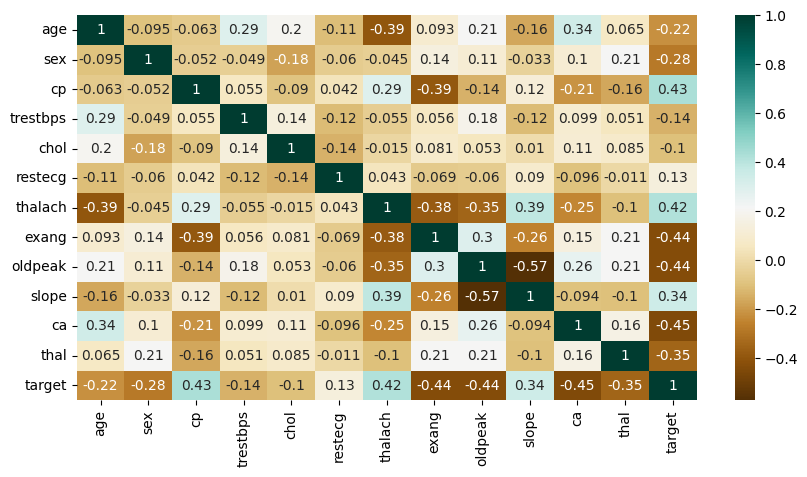

In [40]:
# Adjusting the Size of Figure
plt.figure(figsize=(10,5))
# calculating the Correlation
correlation = df.corr()
# Displaying the correlation using the Heap Map
sns.heatmap(correlation,cmap="BrBG",annot=True) # Br: Brown. B: Blue, G: Green

#correlation

**## Features Scaling**

In [41]:
binary_columns = [col for col in df.columns if set(df[col].unique()) == {0, 1}]

print("Binary columns (0, 1):", binary_columns)

Binary columns (0, 1): ['sex', 'exang', 'target']


### As values of the above features are already in 0 and 1, so we don't have to scale them.

### We will only consider the features with contineous values to scale them.

In [42]:
non_binary_columns = [col for col in df.columns if set(df[col].unique()) != {0, 1}]

print("Non Binary columns (0, 1):", non_binary_columns)  # We have to scale only these features.

Non Binary columns (0, 1): ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']


In [43]:
df.head(2)

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212.0,1,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140,203.0,0,155.0,1,3.1,0,0.0,3.0,0


In [44]:
from sklearn.preprocessing import StandardScaler  # Scaling

# List of columns to scale
columns_to_scale = ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']

scaler = StandardScaler()  # Initializing the scaler

# Scaling the above selected columns
scaled_values = scaler.fit_transform(df[columns_to_scale])

# Createing a DataFrame of the scaled values
scaled_df = pd.DataFrame(scaled_values, columns=columns_to_scale, index=df.index)

# Adding the scaled columns back to the original DataFrame
df[columns_to_scale] = scaled_df

In [45]:
df.head(2)

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,-0.935208,-0.377511,-0.704039,0.901657,0.808993,0,-0.025091,0.979514,1.518508,1.13549,0
1,-0.157260,1,-0.935208,0.527318,-0.893880,-1.002541,0.237018,1,1.869266,-2.271182,-0.757370,1.13549,0


### Now seperating "Target" variable

In [46]:
x = df.drop('target', axis = 1) # This will include all features except "target"
y = df['target'] # It will contain only "target", which is target variable

In [47]:
print(x.shape)

(302, 12)


In [48]:
print(y.shape)

(302,)


In [49]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64


### Now splitting the dataset into trainig and testing data

In [50]:
# using the above x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 101)

In [51]:
x_train.shape
x_train

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
99,2.388965,0,1.005911,0.527318,-1.020441,2.805854,-1.478908,0,0.065117,-0.645834,-0.757370,-0.529161
449,-0.267966,1,-0.935208,-1.161697,-0.324356,0.901657,0.457008,0,-0.927166,0.979514,0.380569,-0.529161
89,1.503322,1,-0.935208,0.768605,-1.104815,0.901657,-0.378955,0,2.139889,-0.645834,1.518508,1.135490
189,1.060500,1,1.005911,-0.377511,1.342029,0.901657,-0.818936,1,0.696569,-0.645834,-0.757370,1.135490
694,-1.707137,1,-0.935208,-0.799765,-0.556384,0.901657,-0.422953,0,0.155324,-0.645834,-0.757370,1.135490
...,...,...,...,...,...,...,...,...,...,...,...,...
42,0.728383,0,-0.935208,-0.075902,1.784993,-1.002541,0.852991,0,-0.927166,0.979514,-0.757370,-0.529161
85,-1.153610,1,0.035352,-0.679121,-0.535291,0.901657,0.896989,0,-0.927166,0.979514,-0.757370,-0.529161
100,-1.264315,0,1.005911,-0.558477,-0.682945,0.901657,0.676999,0,-0.746751,-0.645834,-0.757370,-0.529161
69,0.839089,0,-0.935208,1.733756,-1.716526,-1.002541,-0.202963,0,2.681134,-2.271182,2.087477,1.135490


In [52]:
y_train.shape
y_train

,target
99,1
449,0
89,0
189,0
694,0
...,...
42,0
85,1
100,1
69,0


### Now finally, training the model

### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression # importing model

Log_reg = LogisticRegression() # Creating instance of model

Log_reg.fit(x_train, y_train) # Passing training data to the model

LogisticRegression()

### Model evaluation

Logistic Regression
**********************************************
Accuracy:  85.25
Precision:  89.47
Recall:  87.18
F1 Score:  88.31
Confusion Matrix: 
  [[18  4]
 [ 5 34]]


<Axes: >

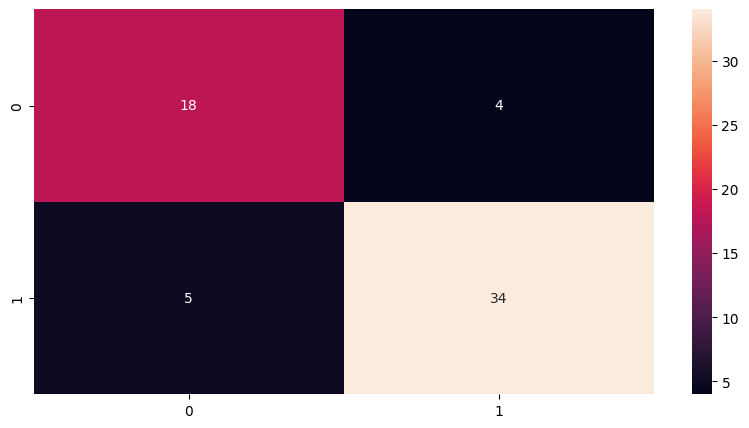

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_log_reg = Log_reg.predict(x_test) # prediction from the model

# scoring
print("Logistic Regression")
print("**********************************************")
Log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100, 2) # Accuracy
print("Accuracy: ", Log_reg_accuracy)

Log_reg_precision = round(precision_score(y_test, y_pred_log_reg) * 100, 2) # Precision
print("Precision: ", Log_reg_precision)

Log_reg_recall = round(recall_score(y_test, y_pred_log_reg) * 100, 2) # Recall
print("Recall: ", Log_reg_recall)

Log_reg_f1_score = round(f1_score(y_test, y_pred_log_reg) * 100, 2) # F1 score
print("F1 Score: ", Log_reg_f1_score)

Log_reg_confusion_matrix = confusion_matrix(y_test, y_pred_log_reg) # Confusion Matrix
print("Confusion Matrix: \n ", Log_reg_confusion_matrix)

sns.heatmap(Log_reg_confusion_matrix, annot=True, fmt='d')

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

Random Forest
**********************************************
Accuracy:  81.97
Precision:  88.89
Recall:  82.05
F1 Score:  85.33
Confusion Matrix: 
  [[18  4]
 [ 7 32]]


<Axes: >

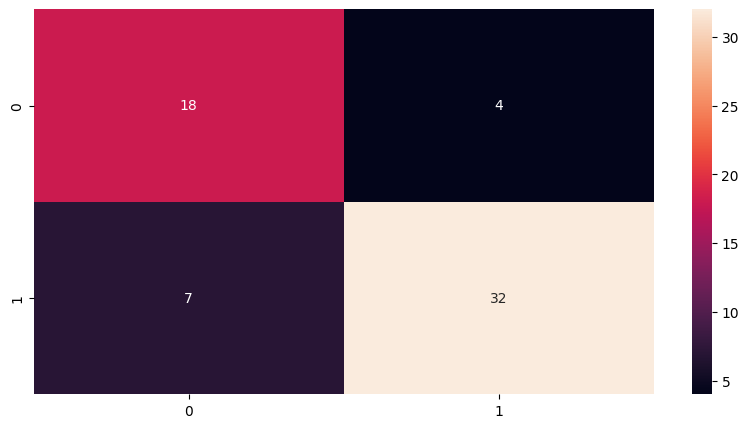

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_pred_rf = rf.predict(x_test) # prediction from the model

# scoring
print("Random Forest")
print("**********************************************")
rf_accuracy = round(accuracy_score(y_test, y_pred_rf) * 100, 2) # Accuracy
print("Accuracy: ", rf_accuracy)

rf_precision = round(precision_score(y_test, y_pred_rf) * 100, 2) # Precision
print("Precision: ", rf_precision)

rf_recall = round(recall_score(y_test, y_pred_rf) * 100, 2) # Recall
print("Recall: ", rf_recall)

rf_f1_score = round(f1_score(y_test, y_pred_rf) * 100, 2) # F1 score
print("F1 Score: ", rf_f1_score)

rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf) # Confusion Matrix
print("Confusion Matrix: \n ", rf_confusion_matrix)

sns.heatmap(rf_confusion_matrix, annot=True, fmt='d')

### Support Vector Machine (SVM)

In [57]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

Support Vector Machine
**********************************************
Accuracy:  81.97
Precision:  88.89
Recall:  82.05
F1 Score:  85.33
Confusion Matrix: 
  [[18  4]
 [ 7 32]]


<Axes: >

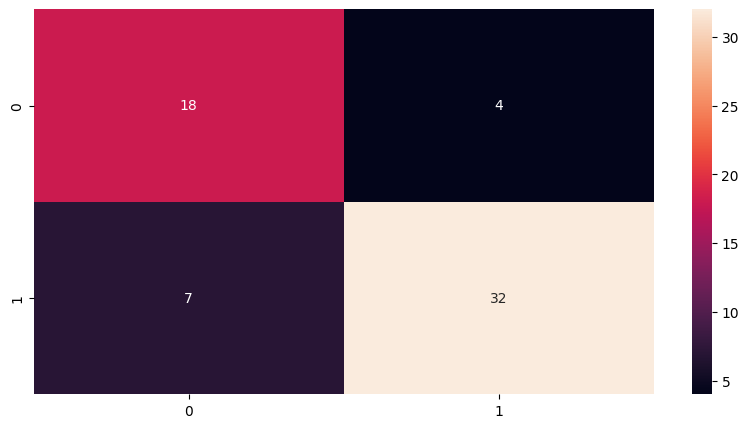

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_pred_svm = rf.predict(x_test) # prediction from the model

# scoring
print("Support Vector Machine")
print("**********************************************")
svm_accuracy = round(accuracy_score(y_test, y_pred_svm) * 100, 2) # Accuracy
print("Accuracy: ", svm_accuracy)

svm_precision = round(precision_score(y_test, y_pred_svm) * 100, 2) # Precision
print("Precision: ", svm_precision)

svm_recall = round(recall_score(y_test, y_pred_svm) * 100, 2) # Recall
print("Recall: ", svm_recall)

svm_f1_score = round(f1_score(y_test, y_pred_svm) * 100, 2) # F1 score
print("F1 Score: ", svm_f1_score)

svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm) # Confusion Matrix
print("Confusion Matrix: \n ", svm_confusion_matrix)

sns.heatmap(svm_confusion_matrix, annot=True, fmt='d')

## Models comparison and chosing best model

In [63]:
# Data for the models
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine'],
    'Accuracy': [85.25, 81.97, 81.97],
    'Precision': [89.47, 88.89, 88.89],
    'Recall': [87.18, 82.05, 82.05],
    'F1 Score': [88.31, 85.33, 85.33]
}

# Creating a DataFrame
results_df = pd.DataFrame(data)

# Displaying the table
print("Model Performance Metrics:")
print(results_df)

# Pretty Table Display
from tabulate import tabulate
print("\nFormatted Table:")
print(tabulate(results_df, headers='keys', tablefmt='grid', showindex=False))

Model Performance Metrics:
                    Model  Accuracy  Precision  Recall  F1 Score
0     Logistic Regression     85.25      89.47   87.18     88.31
1           Random Forest     81.97      88.89   82.05     85.33
2  Support Vector Machine     81.97      88.89   82.05     85.33

Formatted Table:
+------------------------+------------+-------------+----------+------------+
| Model                  |   Accuracy |   Precision |   Recall |   F1 Score |
+========================+============+=============+==========+============+
| Logistic Regression    |      85.25 |       89.47 |    87.18 |      88.31 |
+------------------------+------------+-------------+----------+------------+
| Random Forest          |      81.97 |       88.89 |    82.05 |      85.33 |
+------------------------+------------+-------------+----------+------------+
| Support Vector Machine |      81.97 |       88.89 |    82.05 |      85.33 |
+------------------------+------------+-------------+----------+-------

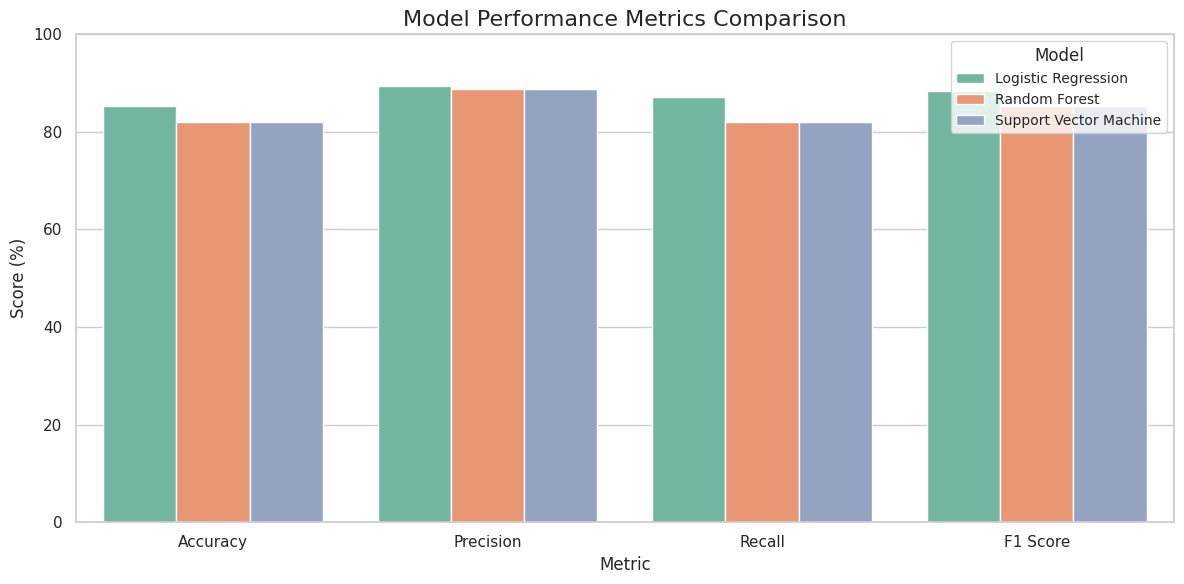

In [64]:
# Data for the models
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine'],
    'Accuracy': [85.25, 81.97, 81.97],
    'Precision': [89.47, 88.89, 88.89],
    'Recall': [87.18, 82.05, 82.05],
    'F1 Score': [88.31, 85.33, 85.33]
}

# Creating a DataFrame
results_df = pd.DataFrame(data)

# Melting the DataFrame for easier plotting
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Setting the seaborn style
sns.set(style="whitegrid")

# Plotting the metrics
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=results_melted, palette='Set2')

# Adding title and labels
plt.title('Model Performance Metrics Comparison', fontsize=16)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Score (%)', fontsize=12)
plt.legend(title='Model', fontsize=10)
plt.ylim(0, 100)

# Showing the plot
plt.tight_layout()
plt.show()

## **Conclusion Report**

### As the objective of the task is to predict a heart disease which is a very critical decision.

### So here we have to keep in mind the following evaluation metrices:
### **Accuracy:** The proportion of correct predictions out of the total predictions.
### **Recall:** The proportion of true positives out of all actual positive cases.
### **F1-Score:** The harmonic mean of precision and recall, balancing both.
### So we have to select a model with high accuracy, high recall and best F1 score.

### Final Decision: From the above observations **"Logistic Regression"** is a most suitale model for this problem.